In [1]:
import sys
sys.path.append('../')
# from experiments import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypolo2

# pm2.5 concentration at different time point

In [5]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"],
                       ["change_interval4","change_interval8","change_interval12"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
change_intervals = [4,8,12]
strategy_meanpm = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_meanpm = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_meanpm = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            pm = data['truth_env']
            time_meanpm = []
            for time_point in range(48): 
                # 获取特定时间点的效果数据
                time_meanpm.append(np.mean(pm[time_point]))
            seed_meanpm.append(time_meanpm)
        variable_meanpm.append(seed_meanpm)
    strategy_meanpm.append(variable_meanpm)
strategy_meanpm = np.array(strategy_meanpm)
print(strategy_meanpm.shape)

(4, 5, 12, 48)


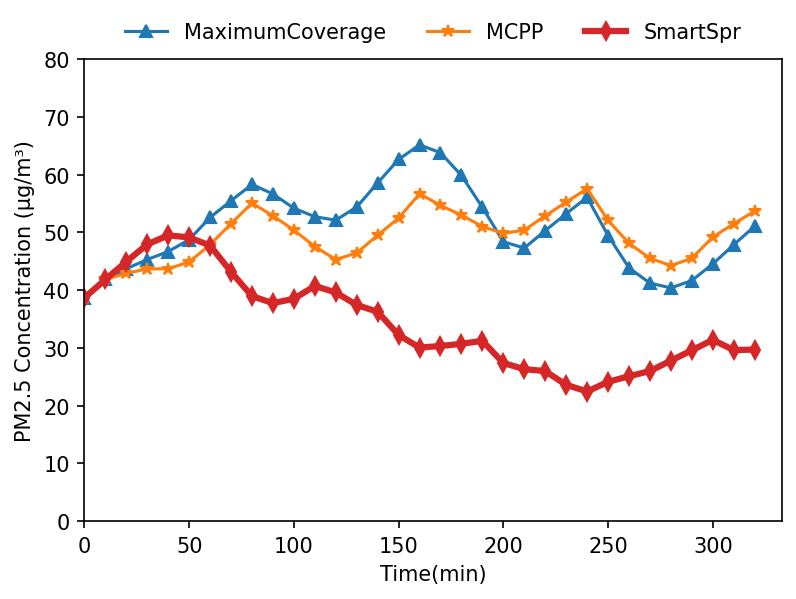

In [29]:
Time_deadline = 33
xtitle = 'Time(min)'
ytitle = 'PM2.5 Concentration (μg/m³)'
filename = './outputs/png/line_timeAveragePollution-teamsize3-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = np.arange(0, Time_deadline)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_meanpm[2][2][7][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_meanpm[1][2][7][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_meanpm[0][2][7][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 80])
plt.xticks(np.arange(0, Time_deadline, 5), np.arange(0, Time_deadline, 5) * 10)

plt.savefig(filename,bbox_inches = 'tight')

# Cumulative pm2.5 concentration at different time point

In [24]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
strategy_effect = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_effect = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_effect = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            effect = data['spray_effect']
            # 获取特定时间点的效果数据
            time_effect = []
            for time_point in range(48):
                time_effect.append(effect[time_point]/400)
                if len(time_effect) > 1:
                    time_effect[-1] = time_effect[-1] + time_effect[-2]
            seed_effect.append(time_effect)
        variable_effect.append(seed_effect)
    strategy_effect.append(variable_effect)
strategy_effect = np.array(strategy_effect)
print(strategy_effect.shape)

(4, 5, 12, 48)


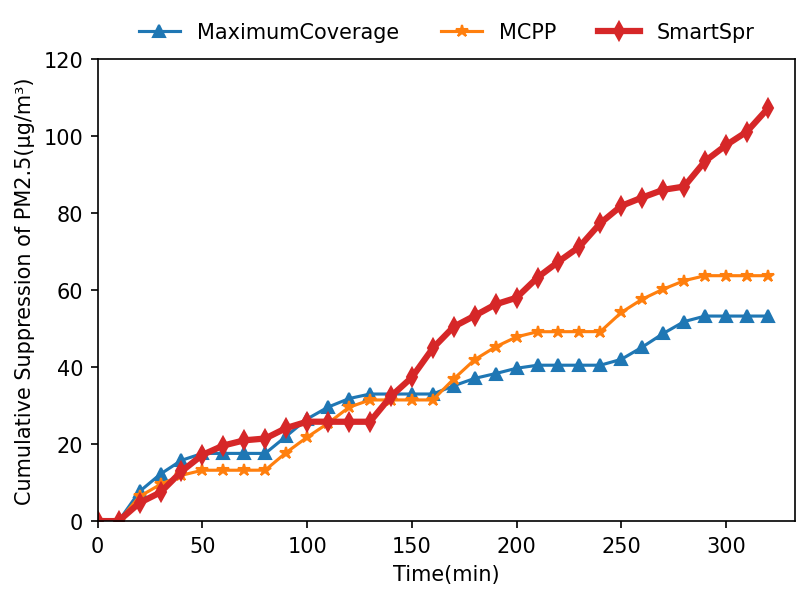

In [28]:
Time_deadline = 33
xtitle = 'Time(min)'
ytitle = 'Cumulative Suppression of PM2.5(μg/m³)'
filename = './outputs/png/line_timeCumulateEffect-teamsize2-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = np.arange(0, Time_deadline)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_effect[2][1][3][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_effect[1][1][3][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_effect[0][1][3][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 120])
plt.xticks(np.arange(0, Time_deadline, 5), np.arange(0, Time_deadline, 5) * 10)

plt.savefig(filename,bbox_inches = 'tight')